

---

<center><h1>Assignment 4 - Akash Biswal(axb200166)</h1></center>

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [62]:
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [63]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

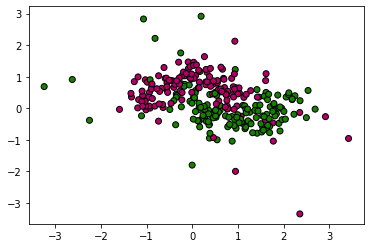

In [64]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

C values selected: 
[1.0, 10.0, 100.0, 10000.0]


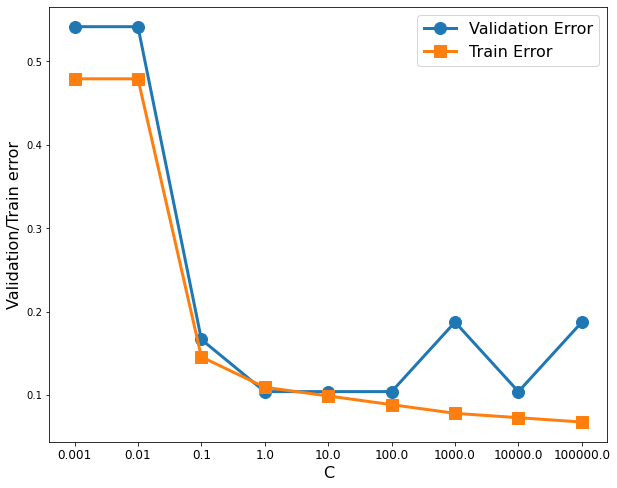

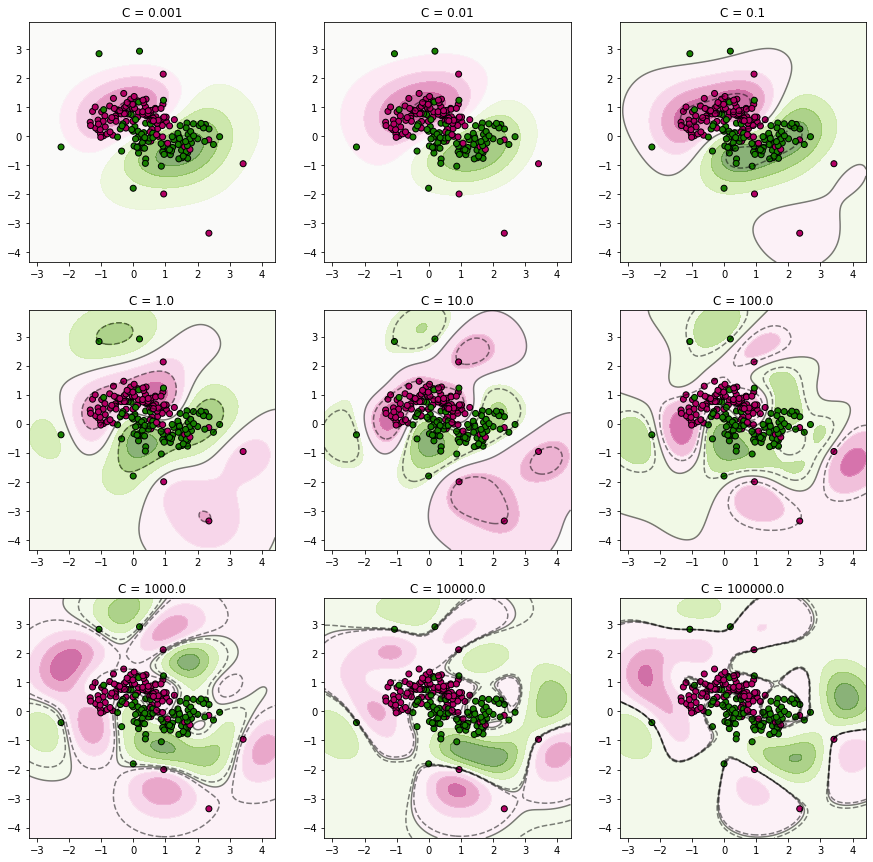

In [65]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)
C_vals = list(C_values)
models = dict()
trnErr = dict()
valErr = dict()

for ind,C in enumerate(C_values):
  clf = SVC(C = C, gamma = "scale")
  clf.fit(X_trn, y_trn)
  trnErr[ind] = 1 - clf.score(X_trn, y_trn)
  valErr[ind] = 1 - clf.score(X_val, y_val)
  models.update({C: clf})

#plotting training and validation error together for all C
plt.figure(figsize=(10,8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('C', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnErr.keys()), ('0.001', '0.01', '0.1', '1.0', '10.0','100.0','1000.0','10000.0','100000.0'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)

visualize(models, 'C', X_trn, y_trn)

#filtering best C values based on validaiton error
err_min=1
count_err_min=1
best_C=[]
for val in valErr:
    if(valErr[val] < err_min ):
        err_min=valErr[val]
        best_C.clear()
        best_C.append(C_vals[val])
    elif (valErr[val] == err_min ):
        count_err_min +=1
        best_C.append(C_vals[val])
        

print('C values selected: ')
print(best_C)


# **1a. Discussion**
- With increase in C the training error is seen to reduce.
- Validation error decreases till C reaches 100, then it vibrates in an increasing and decreasing fashion.
- C behaves like a regularizing parameter, with increase in C the boundaries become more complex.
- For larger values of C the margin will be smaller, and the decisions will classify more training data correctly.
- For smaller values of C the margin will be larger, therefore the decisions will be more general, therefore training accuracy is less
- As seen in the visulaized models, lower C has simpler boundaries whereas higher C has complex boundaries.
- Larger C increases the cost of misclassification which causes overfitting.

## Test errors of different C from the best selected:
{C=1: 0.16666666666666663,
C=10: 0.16666666666666663,
C=100: 0.15000000000000002,
C=10000: 0.19999999999999996}

In [66]:
# C=100 is Cbest.
clf = SVC(C = 100,gamma='scale')
clf.fit(X_trn, y_trn)
y_tstpred = clf.predict(X_tst)
tstErr=1-accuracy_score(y_tst,y_tstpred)
#tstErr =np.sum(np.power(np.subtract(y_tst,y_tstpred),2))/len(y_tst)
print('Test Error was evaluated to be : '+ str(tstErr))
print("Test accuracy for the best C(100): ",accuracy_score(y_tst,y_tstpred)*100)

Test Error was evaluated to be : 0.15000000000000002
Test accuracy for the best C(100):  85.0


---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

Gamma values selected: 
[1.0, 10.0]


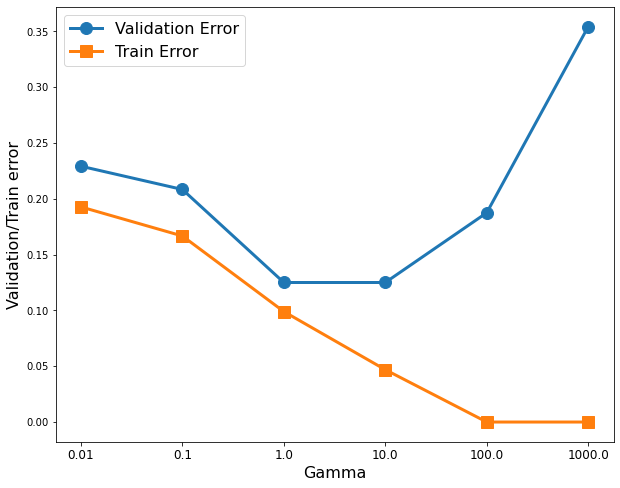

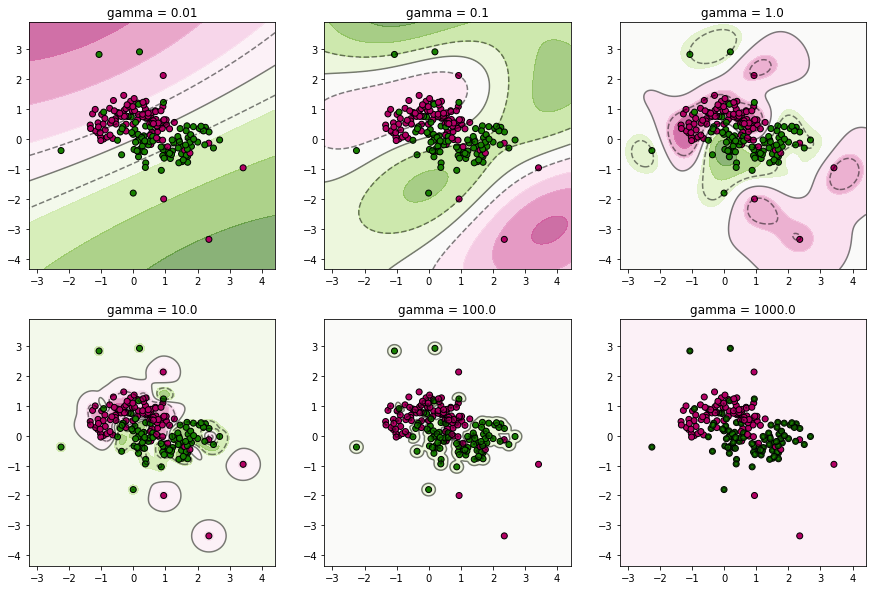

In [67]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
G_vals = list(gamma_values)
models = dict()
trnErr = dict()
valErr = dict()

for ind,G in enumerate(gamma_values):
  clf = SVC(C = 10, gamma = G, kernel="rbf")
  clf.fit(X_trn, y_trn)
  trnErr[ind] = 1 - clf.score(X_trn, y_trn)
  valErr[ind] = 1 - clf.score(X_val, y_val)
  models.update({G: clf})
  
#plotting training and validation error together for all Gamma values
plt.figure(figsize=(10,8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('Gamma', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnErr.keys()), ( '0.01', '0.1', '1.0', '10.0','100.0','1000.0'),fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16) 

visualize(models, 'gamma', X_trn, y_trn)

#filtering best Gamma values based on validaiton error
err_min=1
count_err_min=1
best_G=[]
for val in valErr:
    if(valErr[val] < err_min ):
        err_min=valErr[val]
        best_G.clear()
        best_G.append(G_vals[val])
    elif (valErr[val] == err_min ):
        count_err_min +=1
        best_G.append(G_vals[val])
        

print('Gamma values selected: ')
print(best_G)

## **1b. Discussion**
- With increase in Gamma($\gamma$) the training error is seen to reduce.
- Validation error decreases till $\gamma$ reaches 1=, then it starts to increase.
- When $\gamma$ increases the partitions become finer and model becomes less accurate.
- Islands of decisions are created for high $\gamma$ as seen in the visualized models.
- In terms of the RBF kernel, increased $\gamma$ increases the effect of squared euclidean distance in k(x,z), therefore model becomes less accurate.

### Gamma values with best validation error = 1.0, 10.0
### Test error 
{G=1.0: 0.16666666666666663 , G=10.0: 0.16666666666666663}

### G = 1.0 is better as the boundaries seem more general, sicne there are less islands than G=10.0.


---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [68]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()
#
# Insert your code here.
#
raw_trn = np.loadtxt("wdbc_trn.csv", delimiter=',')
raw_val = np.loadtxt("wdbc_val.csv", delimiter=',')
raw_tst = np.loadtxt("wdbc_tst.csv", delimiter=',')
X_trn, y_trn = raw_trn[:,1:], raw_trn[:,0]
X_val, y_val = raw_val[:,1:], raw_val[:,0]
X_tst, y_tst = raw_tst[:,1:], raw_tst[:,0]



Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [69]:
#code for Q2
C_range = np.arange(-2.0, 5.0, 1.0)
C_values = np.power(10.0, C_range)
gamma_range = np.arange(-3.0, 3.0, 1.0)
gamma_values = np.power(10.0, gamma_range)
C_vals, G_vals = list(C_values), list(gamma_values)

best_C = []
best_G = []
test_errors = []

#filtering best C and Gamma combination, caculating test error for that combination
err_min = 1
for ind1, C in enumerate(C_values):
    for ind2, G in enumerate(gamma_values):
        clf = SVC(C = C,gamma=G,kernel='rbf')
        clf.fit(X_trn, y_trn)
        valErr = 1 - clf.score(X_val, y_val)
        tstErr = 1 - clf.score(X_tst, y_tst)
        if(valErr < err_min ):
            err_min=valErr
            best_G.clear()
            best_C.clear()
            test_errors.clear()
            best_G.append(G_vals[ind2])
            best_C.append(C_vals[ind1])
            test_errors.append(tstErr)
        elif (valErr == err_min):
            best_G.append(G_vals[ind2])
            best_C.append(C_vals[ind1])
            test_errors.append(tstErr)

print('C values selected: ')
print(best_C)
print('Gamma values selected: ')
print(best_G)
print('Test Error was evaluated to be : ', test_errors)
print('Least Validaiton Error: ', err_min)
print("Maximum validation accuracy: ", (1-err_min)*100)

C values selected: 
[100.0, 1000.0, 10000.0, 10000.0]
Gamma values selected: 
[0.01, 0.01, 0.001, 0.01]
Test Error was evaluated to be :  [0.034782608695652195, 0.05217391304347829, 0.060869565217391286, 0.05217391304347829]
Least Validaiton Error:  0.02608695652173909
Maximum validation accuracy:  97.3913043478261


#### Least test error is 0.034782608695652195
#### Therefore C_best - 100 and $\gamma$ _best - 0.01 based on the corresponding index

In [70]:
#getting this models test accuracy
print("Test accuracy for the best C(100) and best Gamma(0.01): ", (1-test_errors[0])*100,"%")

Test accuracy for the best C(100) and best Gamma(0.01):  96.52173913043478 %


### *Final test set accuracy for C=100 and $\gamma$ = 0.01 is 96.52%*

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

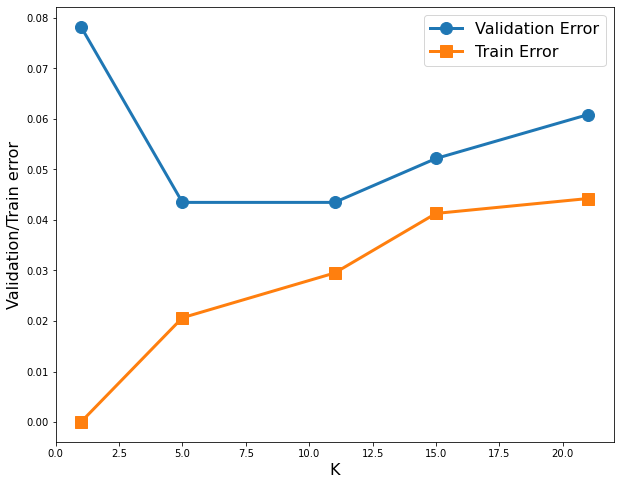

In [71]:
# code for Q3
K = [1,5,11,15,21]
trnErr= []
valErr = []
for ind, k in enumerate(K):
    neighbours = KNN(n_neighbors= k ,algorithm='kd_tree')
    neighbours.fit(X_trn, y_trn)
    trnErr.append(1-neighbours.score(X_trn, y_trn))
    valErr.append(1-neighbours.score(X_val, y_val))


# plotting training and validation error together for all K
plt.figure(figsize=(10,8))
plt.plot(K, valErr, marker='o', linewidth=3, markersize=12)
plt.plot(K, trnErr, marker='s', linewidth=3, markersize=12)
plt.xlabel('K', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)

#### As seen from the plot K=5 and K=11 both give the least validaiton error.
#### Test accuracy for K=5 is 95.65217391304348%
#### Test accuracy for K=11 is 97.3913043478261%

### K_best = 11

In [72]:
#test accuracy of the best K
neighbours = KNN(n_neighbors=11,algorithm='kd_tree')
neighbours.fit(X_trn,y_trn) 
ytst_pred=neighbours.predict(X_tst)
print('Test Accuracy')
print(accuracy_score(y_tst,ytst_pred)*100)

Test Accuracy
97.3913043478261


### *Test accuracy of K=11, KNN model on test set is 97.39%*

**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.

### The best kNN model gives a test accuracy of 97.39% whereas the best SVM model gives us a tets accuracy of 96.52%
### The Wisconsin Breast Cancer dataset has more features and kNN would be better suited for this classification task.